In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import shutil
import subprocess
import re

In [2]:
#Por cada Red Cambiamos el archivo ising general para cambiar el numero de nodos
def change_ising_cpp(nodes,outfile):
    with open('ising_general.cpp', 'r') as file:
        for line in file:
            if '%marker' in line:
                line = line.replace('%marker', str(nodes))
            outfile.write(line)
            
def average_magnetization(ensamble):
    Temperture = np.unique(ensamble[:,0])
    Average_n_spin = []
    for T in Temperture:
        Average_n_spin.append(np.mean(abs(ensamble[:,1][ensamble[:,0] == T])))
    return Average_n_spin

def average_suceptibility(ensamble):
    Temperture = np.unique(ensamble[:,0])
    var_n_spin = []
    for T in Temperture:
        var_n_spin.append((np.var(abs(ensamble[:,1][ensamble[:,0] == T])))/T)
    return var_n_spin

def binder_parameter(ensamble):
    Temperture = np.unique(ensamble[:,0])
    average_binder_parameter = []
    for T in Temperture:
        square_m = np.mean(abs(ensamble[:,1][ensamble[:,0] == T])**2)**2
        fourth_m = np.mean(abs(ensamble[:,1][ensamble[:,0] == T])**4)
        U_l = 1-((1/3)*(fourth_m/square_m))
        average_binder_parameter.append(U_l)
    return average_binder_parameter
    

def average_energy(ensamble):
    Temperture = np.unique(ensamble[:,0])
    Energy_n_spin = []
    for T in Temperture:
        Energy_n_spin.append(np.mean(ensamble[:,2][ensamble[:,0] == T]))
    return Energy_n_spin

def average_C(ensamble):
    Temperture = np.unique(ensamble[:,0])
    var_energy_n_spin = []
    for T in Temperture:
        var_energy_n_spin.append(np.var(ensamble[:,2][ensamble[:,0] == T])/T**2)
    return var_energy_n_spin

# Creacion de arboles

In [9]:
#Creacion de las redes, manteniendo fijo branching factor aumentando la profundidad
trees_h = []
mean_degress_h = []
mean_degress_2_h = []
profundidad_h = []
for i in range(6):
    #print(i)
    profundidad_h.append(i)
    red = nx.balanced_tree(3,i)
    trees_h.append(red)
    mean_degress_h.append(pd.DataFrame(red.degree())[1].mean())
    mean_degress_2_h.append(pd.DataFrame(red.degree())[1].apply(lambda x: np.power(x,2)).mean())
    
    
#Creacion de las redes, manteniendo fijo profundidad factor aumentando la branching
trees_r = []
mean_degress_r = []
mean_degress_2_r = []
profundidad_r = []
for i in range(6):
    print(i)
    profundidad_r.append(i)
    red = nx.balanced_tree(i,3)
    trees_r.append(red)
    mean_degress_r.append(pd.DataFrame(red.degree())[1].mean())
    mean_degress_2_r.append(pd.DataFrame(red.degree())[1].apply(lambda x: np.power(x,2)).mean())

0
1
2
3
4
5


In [10]:
#Cambiando los dos parametros 
trees_r_h = []
mean_degress_r_h = []
mean_degress_2_r_h = []
profundidad_r_h = []
for i in range(6):
    
    profundidad_r_h.append(i)
    red = nx.balanced_tree(i,i)
    trees_r_h.append(red)
    mean_degress_r_h.append(pd.DataFrame(red.degree())[1].mean())
    mean_degress_2_r_h.append(pd.DataFrame(red.degree())[1].apply(lambda x: np.power(x,2)).mean())
    print(i)

0
1
2
3
4
5


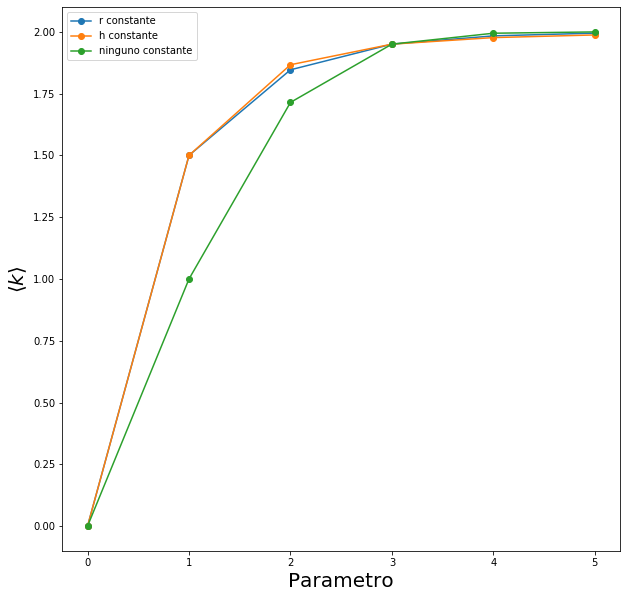

In [11]:
#Graficamos el numero de nodos contra la K promedio
plt.figure(figsize = (10,10))
plt.plot(profundidad_h,mean_degress_h,'o-',label = 'r constante')
plt.plot(profundidad_r,mean_degress_r,'o-',label = 'h constante')
plt.plot(profundidad_r_h,mean_degress_r_h,'o-',label = 'ninguno constante')
plt.xlabel('Parametro', size = 20)
plt.ylabel(r'$\langle k \rangle$', size = 20)
plt.legend()
plt.show()

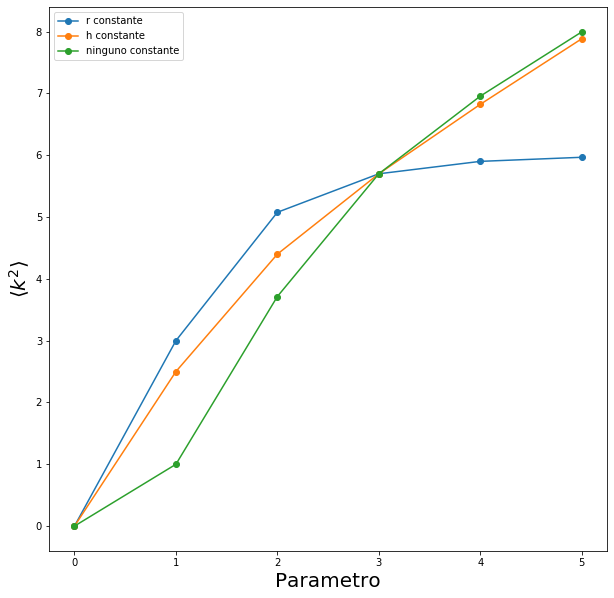

In [12]:
#Graficamos el numero de nodos contra la K^2 promedio
plt.figure(figsize = (10,10))
plt.plot(profundidad_h,mean_degress_2_h,'o-', label = 'r constante')
plt.plot(profundidad_r,mean_degress_2_r,'o-', label = 'h constante')
plt.plot(profundidad_r_h,mean_degress_2_r_h,'o-', label = 'ninguno constante')
plt.xlabel('Parametro', size = 20)
plt.ylabel(r'$\langle k^2 \rangle$', size = 20)
plt.legend()
plt.show()

In [13]:
#GRaficamos el numero de nodos
nodes_h = []
nodes_r = []
nodes_r_h = []
for i in range(len(trees_r)):
    nodes_h.append(len(trees_h[i].nodes()))
    nodes_r.append(len(trees_r[i].nodes()))
    nodes_r_h.append(len(trees_r_h[i].nodes()))

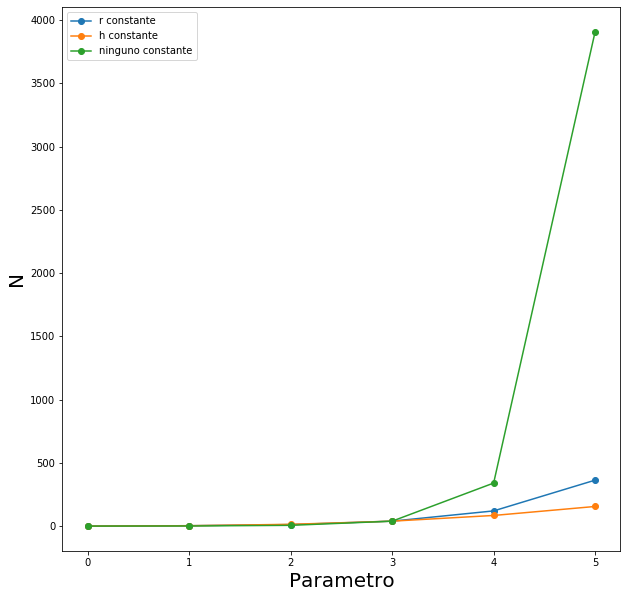

In [14]:
#Graficamos el numero de nodos contra la K^2 promedio
plt.figure(figsize = (10,10))
plt.plot(profundidad_h,nodes_h,'o-', label = 'r constante')
plt.plot(profundidad_r,nodes_r,'o-', label = 'h constante')
plt.plot(profundidad_r_h,nodes_r_h,'o-', label = 'ninguno constante')
plt.xlabel('Parametro', size = 20)
plt.ylabel(r'N', size = 20)
plt.legend()
plt.show()

# Exportacion de arboles

In [ ]:
#Exportamos las matrices de adjacencia
parent_dir = './Adjacency Matrix'
for i in range(len(trees_h)):
    directory = os.path.join(parent_dir, 'trees_h_' + str(i))
    os.mkdir(directory)
    nx.write_edgelist(trees_h[i], directory + '/Lines.dat', delimiter = '  ', data = False)    
    
for i in range(len(trees_r)):
    directory = os.path.join(parent_dir, 'trees_r_' + str(i))
    os.mkdir(directory)
    nx.write_edgelist(trees_r[i], directory + '/Lines.dat', delimiter = '  ', data = False)    

In [ ]:
parent_dir = './Adjacency Matrix'
for i in range(len(trees_r_h)-1):
    directory = os.path.join(parent_dir, 'trees_r_h' + str(i))
    os.mkdir(directory)
    nx.write_edgelist(trees_r_h[i], directory + '/Lines.dat', delimiter = '  ', data = False)   

In [ ]:
nx.write_edgelist(trees_h[7], './Adjacency Matrix/trees_h_7'   + '/Lines.dat', delimiter = '  ', data = False)
nx.write_edgelist(trees_r[7], './Adjacency Matrix/trees_r_7'  '/Lines.dat', delimiter = '  ', data = False)  

In [ ]:
#Creamos una carpeta de Results en cada directorio
for element in glob.glob('./Adjacency Matrix/trees_t_h./'):
    directory = os.path.join(element, 'Results')
    os.mkdir(directory)

In [ ]:
#Por cada tree copiamos el ising_model con su respectivbo numero de nodos
parent_dir = './Adjacency Matrix'
for i in range(len(trees_h)):
    directory = os.path.join(parent_dir, 'trees_h_' + str(i))
    directory = os.path.join(directory, 'ising_general.cpp')
    nodes = len(trees_h[i].nodes())
    with open(directory,'w') as outfile:
        change_ising_cpp(nodes, outfile)

In [ ]:
#Por cada tree copiamos el ising_model con su respectivbo numero de nodos
parent_dir = './Adjacency Matrix'
for i in range(len(trees_r)):
    directory = os.path.join(parent_dir, 'trees_r_' + str(i))
    directory = os.path.join(directory, 'ising_general.cpp')
    nodes = len(trees_r[i].nodes())
    with open(directory,'w') as outfile:
        change_ising_cpp(nodes, outfile)

In [ ]:
#Por cada tree copiamos el ising_model con su respectivbo numero de nodos
parent_dir = './Adjacency Matrix'
for i in range(len(trees_r_h)):
    directory = os.path.join(parent_dir, 'trees_r_h' + str(i))
    directory = os.path.join(directory, 'ising_general.cpp')
    nodes = len(trees_r_h[i].nodes())
    with open(directory,'w') as outfile:
        change_ising_cpp(nodes, outfile)

## Numero de nodos

In [15]:
for i in range(len(trees_r)):
    print(len(trees_r[i].nodes()))

1
4
15
40
85
156


In [16]:
#Altura h del arbol
for i in range(len(trees_r)):
    print(len(trees_h[i].nodes()))

1
4
13
40
121
364


In [17]:
#Altura h del arbol
for i in range(len(trees_r_h)):
    print(len(trees_r_h[i].nodes()))

1
2
7
40
341
3906


In [ ]:
nx.draw(trees_h[7], node_size = 10)

In [ ]:
nx.draw(trees_r[7], node_size = 10)

# Graficas

## Magnetizacion

/mnt/c/Users/Lenovo/Desktop/Semestre 2023-01/Estadistica 2/Proyecto/Networks-20221116T003231Z-001/Networks$

In [3]:
temperaturas = [round(0.1 + 0.10*n,2) for n in range(50)]

In [7]:
#Magnetizacion
magentization_list = []
for element in glob.glob('./Adjacency Matrix/**/Results_ensemble.dat'):
    try:
        parameter = re.findall('(h_\d+|r_\d+|r_h\d+)', element)[0].replace('_',' = ')
        print(parameter)
        if parameter == 'r = h5' or parameter == 'h = 5':
            pass
        else:
            ensamble = np.loadtxt(element)
            magnetization = average_magnetization(ensamble)
            add = (magnetization,parameter)
            magentization_list.append(add)
    except: 
        pass

h = 1
h = 2
h = 3
h = 4
h = 5
h = 6
h = 7
r = 1
r = 2
r = 3
r = 4
r = 5
r = 6
r = 7
r = h1
r = h2
r = h3
r = h4
r = h5


In [6]:
magentization_list

[]

h = 1
h = 2
h = 3
h = 4
h = 6
h = 7
r = 1
r = 2
r = 3
r = 4
r = 5
r = 6
r = 7
r = h1
r = h2
r = h3
r = h4


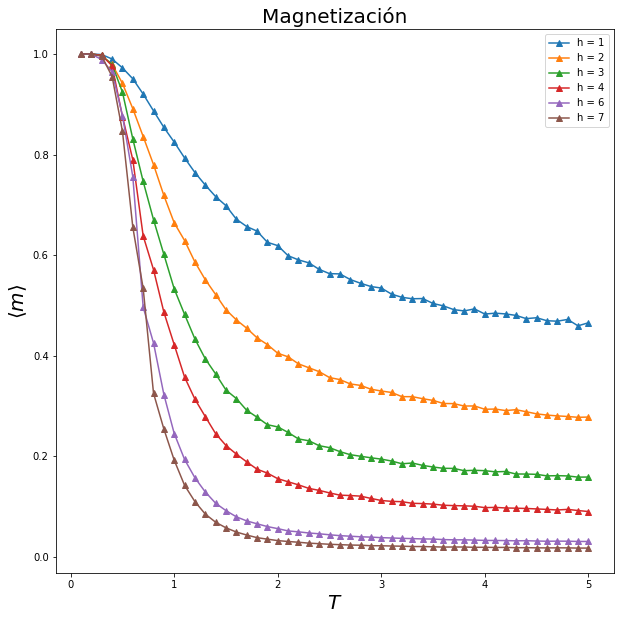

In [19]:
plt.figure(figsize = (10,10))
for values,parameter in magentization_list:
    print(parameter)
    if re.match('h = \d+',parameter) is not None:
        plt.plot(temperaturas,values,'^-', label = parameter)

plt.legend(loc='upper right')
plt.xlabel(r'$T$', size = 20)
plt.ylabel(r'$\langle m \rangle$', size = 20)
plt.title('Magnetización', size = 20)
plt.savefig('./images/Mean_magnetization.jpeg', bbox_inches = 'tight')

In [ ]:
#Magnetizacion para todos los arboles

In [ ]:
names = './Adjacency Matrix/**/Results_ensemble.dat'

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey = True, figsize=(20,20))

for values,parameter in magentization_list:
    if re.match('r = \d+',parameter) is not None:
        axes[0,0].plot(temperaturas,values,'^-', label = parameter)

for values,parameter in magentization_list:
    if re.match('h = \d+',parameter) is not None:
        axes[1].plot(temperaturas,values,'o-', label = parameter)

for values,parameter in magentization_list:
    if re.match('r = h\d+',parameter) is not None:
        axes[2].plot(temperaturas,values,'X-', label = parameter.replace(' = h','_h = '))
 
        
# Labelize
axes[1].set_xlabel(r'$T$', size = 30)
axes[0].set_ylabel(r'$\langle m \rangle$', size = 30)
axes[1].set_title('Magnetización', size = 30)

axes[0].legend()
axes[1].legend()
axes[2].legend()

fig.show()

## Suceptibilidad

In [ ]:
#Suceptibilidad
suceptibility_list = []
for element in glob.glob('./Adjacency Matrix/**/Results_ensemble.dat'):
    print(element)
    try:
        parameter = re.findall('(h_\d+|r_\d+|r_h\d+)', element)[0].replace('_',' = ')
        ensamble = np.loadtxt(element)
        suceptibility = average_suceptibility(ensamble)
        add = (suceptibility,parameter)
        suceptibility_list.append(add)
    except: 
        pass

In [ ]:
plt.figure(figsize = (10,10))
for values,parameter in suceptibility_list:
    if 'r' in parameter:
        plt.plot(temperaturas,values,'^-', label = parameter)
plt.legend(loc='upper right')
plt.xlabel(r'$T$', size = 20)
plt.ylabel(r'$\langle \chi  \rangle$', size = 20)
plt.title('Suceptibilidad', size = 20)
plt.savefig('./images/Mean_suceptibility.jpeg', bbox_inches = 'tight')

# Binder Parameter

In [ ]:
#Suceptibilidad
binder_list = []
for element in glob.glob('./Adjacency Matrix/**/Results_ensemble.dat'):
    print(element)
    try:
        parameter = re.findall('(h_\d+|r_\d+|r_h\d+)', element)[0].replace('_',' = ')
        ensamble = np.loadtxt(element)
        binder = binder_parameter(ensamble)
        add = (binder,parameter)
        binder_list.append(add)
    except: 
        pass

In [ ]:
plt.figure(figsize = (10,10))
for values,parameter in binder_list:
    if re.match('h = \d+',parameter) is not None:
        plt.plot(temperaturas,values,'.-', label = parameter)
plt.legend(loc='upper right')
plt.xlabel(r'$T$', size = 20)
plt.ylabel(r'$U_l$', size = 20)
plt.title('Binder Parameter', size = 20)
#plt.savefig('./images/Mean_suceptibility.jpeg', bbox_inches = 'tight')

In [ ]:
#Energia
energy_list = []
for element in glob.glob('./Adjacency Matrix/**/Results_ensemble.dat'):
    print(element)
    try:
        parameter = re.findall('r_\d+', element)[0].replace('_',' = ')#'(h_\d+|r_\d+)'
        ensamble = np.loadtxt(element)
        energy = average_energy(ensamble)
        add = (energy,parameter)
        energy_list.append(add)
    except: 
        pass

In [ ]:
plt.figure(figsize = (10,10))
for values,parameter in energy_list:
    if 'r' in parameter:
        plt.plot(temperaturas,values,'^-', label = parameter)
plt.legend(loc='lower right')
plt.xlabel(r'$T$', size = 20)
plt.ylabel(r'$\langle E  \rangle$', size = 20)
plt.title('Energia', size = 20)
plt.savefig('./images/Mean_energy.jpeg', bbox_inches = 'tight')

In [ ]:
#Capacidad Calorifica

In [ ]:
C_list = []
for element in glob.glob('./Adjacency Matrix/**/Results_ensemble.dat'):
    print(element)
    try:
        parameter = re.findall('r_\d+', element)[0].replace('_',' = ')#'(h_\d+|r_\d+)'
        ensamble = np.loadtxt(element)
        C = average_C(ensamble)
        add = (C,parameter)
        C_list.append(add)
    except: 
        pass

In [ ]:
plt.figure(figsize = (10,10))
for values,parameter in C_list:
    if 'r' in parameter:
        plt.plot(temperaturas,values,'^-', label = parameter)
plt.legend(loc='upper right')
plt.xlabel(r'$T$', size = 20)
plt.ylabel(r'$\langle C  \rangle$', size = 20)
plt.title('Capacidad Calorífica', size = 20)
plt.savefig('./images/Mean_C.jpeg', bbox_inches = 'tight')

# TCritica

In [ ]:
#Determinacion de temperatura Critica 
def LCC_SLCC(Edges, State):
    Nv = len(State)
    matA_spin = np.zeros([Nv,Nv])
    for link in Edges:
        i = int(link[0])
        j = int(link[1])
        if State[i] == State[j]:
            matA_spin[i][j] = 1
            matA_spin[j][i] = 1
    
    G_s = nx.from_numpy_matrix(matA_spin)
    Components = [len(c) for c in sorted(nx.connected_components(G_s), key=len, reverse=True)]
    
    lcc = Components[0]
    if lcc<Nv:
        slcc = Components[1]
    else:
        slcc = 0
    return (lcc,slcc)

def read_state(file,Edges):
    LCC_list = []
    SLCC_list = []
    States = np.loadtxt(file)
    for i in range(len(States)):
        State = States[i]
        lcc,slcc = LCC_SLCC(Edges, State)
        LCC_list.append(lcc)
        SLCC_list.append(slcc)
    return np.mean(LCC_list),np.mean(SLCC_list)

## Comparacion dos r

In [ ]:
temps_1 = []
LCCs_1 = []
SLCCs_1 = []
for file in glob.glob('./Adjacency Matrix/trees_r_3/Results/*.dat'):
    Edges = np.loadtxt('./Adjacency Matrix/trees_r_3/Lines.dat')
    Nv = 40
    temps_1.append(float(re.findall( r'\d+.\d',file)[0]))
    mean_lcc, mean_slcc = read_state(file,Edges)
    LCCs_1.append(mean_lcc)
    SLCCs_1.append(mean_slcc)

In [ ]:
temps_2 = []
LCCs_2 = []
SLCCs_2 = []
for file in glob.glob('./Adjacency Matrix/trees_r_7/Results/*.dat'):
    Edges = np.loadtxt('./Adjacency Matrix/trees_r_7/Lines.dat')
    Nv = 400
    temps_2.append(float(re.findall( r'\d+.\d',file)[0]))
    mean_lcc, mean_slcc = read_state(file,Edges)
    LCCs_2.append(mean_lcc)
    SLCCs_2.append(mean_slcc)

In [ ]:
colors = ['r','g','b','m','c']
labels = ['trees_r_3','trees_r_7']
LCC_S = [LCCs_1,LCCs_2]
SLCC_S = [SLCCs_1,SLCCs_2]
temps_S = [temps_1,temps_2]

In [ ]:
plt.figure(figsize = (10,10))

for i in range(len(temps_S)):
    
    plt.plot(temps_S[i],LCC_S[i],colors[i] + 'o', alpha = 0.5, label = labels[i])
    plt.plot(temps_S[i],SLCC_S[i],colors[i] + '^', alpha = 0.5)

    
plt.xlabel('T', size = 20)
plt.ylabel('N', size = 20)
plt.legend()
plt.savefig('./images/LCC.jpeg', bbox_inches = 'tight')
plt.show()

In [ ]:
_ = np.loadtxt(r'C:\Users\Lenovo\Desktop\Semestre 2023-01\Estadistica 2\Proyecto\Networks-20221116T003231Z-001\Networks\Adjacency Matrix\trees_h_3\Results_ensemble.dat')

In [ ]:
Temperture = np.unique(_[:,0])
Average_n_spin = []
for T in Temperture:
    #print(T)
    Average_n_spin.append(np.mean(abs(_[:,1][_[:,0] == T])))

In [ ]:
plt.plot(Temperture,Average_n_spin,'k.-')
plt.xlabel(r'$T$', size = 20)
plt.ylabel(r'$\langle m \rangle$', size = 20)
plt.show()

In [ ]:
plt.plot(Temperture,Average_n_spin,'k.-')
plt.xlabel(r'$T$', size = 20)
plt.ylabel(r'$\langle m \rangle$', size = 20)
plt.show()